In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

初始化数据$X\in R^{|D|\times (k+1)},Y\in R^{|D|\times 1},W\in R^{(k+1)\times 1}$

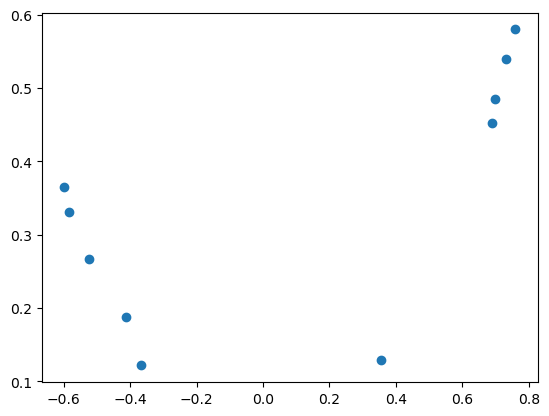

In [2]:
D = 10
x = (np.random.rand(1,D)-0.5)*2 # x in [-1,1]
epsilon = np.random.normal(0,0.01,(1,D)) # epsilon with μ=0,σ=0.01
y = x**2 + epsilon

plt.scatter(x[0],y[0])
plt.show()

In [3]:
# 设置K = 
k = 10

# MSE$\to$ LSM
$\arg\min_{W}||XW-Y||_F^2$\\
solve $\frac{\partial \mathcal L}{\partial W}= X^T X W-X^T Y=0$

In [4]:
Y = y.T

order = np.arange(k+1)
order = order[:, np.newaxis]
e = np.tile(order, [1,D]) # 将order扩展
XT = np.power(x, e)  # 计算得到X
X = np.transpose(XT) 

a = np.matmul(XT, X) 
b = np.matmul(XT, Y) 
W = np.linalg.solve(a,b) 

### LSM result landscape of [-1,1]

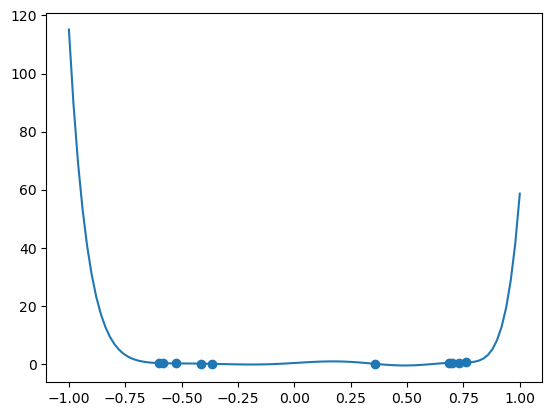

In [5]:
# 绘图部分
order = np.arange(k+1)
order = order[:, np.newaxis]
e = np.tile(order, [1,100])

plot_x = np.linspace(-1,1,100)
plot_XT = np.power(plot_x, e)
plot_y = W.T @ plot_XT


plot_y.shape,plot_x.shape

plt.figure()
plt.scatter(x[0],y[0])
plt.plot(plot_x,plot_y[0,:])

### LSM result landscape of [-3,3]

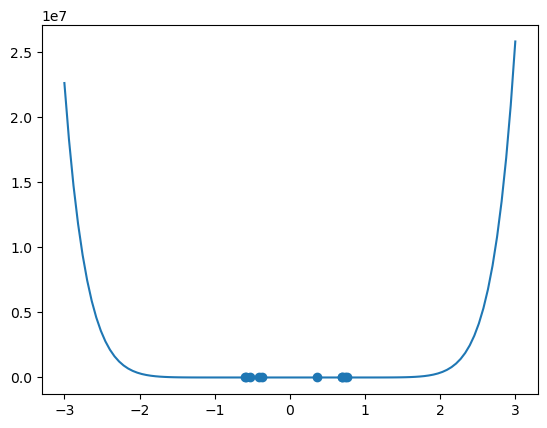

In [6]:
# 绘图部分
order = np.arange(k+1)
order = order[:, np.newaxis]
e = np.tile(order, [1,100])

plot_x = np.linspace(-3,3,100)
plot_XT = np.power(plot_x, e)
plot_y = W.T @ plot_XT


plot_y.shape,plot_x.shape

plt.figure()
plt.scatter(x[0],y[0])
plt.plot(plot_x,plot_y[0,:])

array([[ 4.05208077e-01],
       [ 4.70206043e+00],
       [ 2.77409004e+00],
       [-6.09699616e+01],
       [-7.73586290e+01],
       [ 2.28936013e+02],
       [ 3.77857872e+02],
       [-3.14204969e+02],
       [-7.00210641e+02],
       [ 1.13296036e+02],
       [ 4.83452988e+02]])

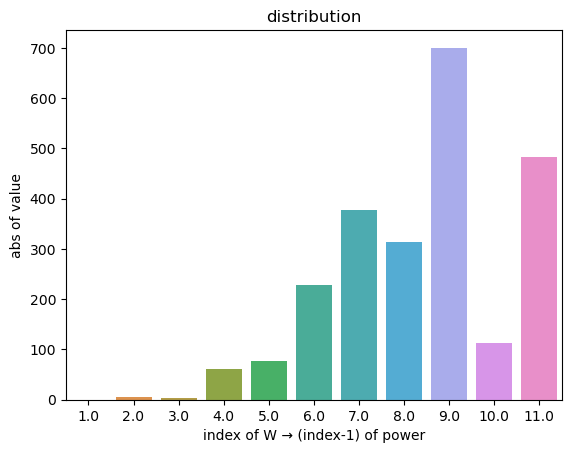

In [7]:
sns.barplot(x=np.linspace(1,k+1,k+1),y=np.abs(W[:,0]))
plt.xlabel('index of W → (index-1) of power')
plt.ylabel('abs of value')
plt.title('distribution')

W

# +L_2 norm
增加L2范数形式 $\arg\min_{W}||XW-Y||_F^2+\lambda ||W||_2^2$\\
solve $\frac{\partial \mathcal L}{\partial W}= X^T X W-X^T Y=0\to W = (X^TX+\lambda I)^{-1}X^TY$

In [8]:
Y = y.T
lambda_ = 0.1

order = np.arange(k+1)
order = order[:, np.newaxis]
e = np.tile(order, [1,D])
XT = np.power(x, e)
X = np.transpose(XT)

a = np.matmul(XT, X) + lambda_*np.identity(k+1)
b = np.matmul(XT, Y) 
W = np.linalg.solve(a,b) 

###  +L2 norm landscape of [-1,1]

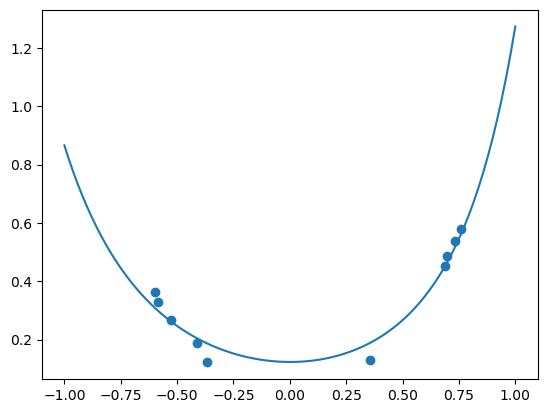

In [9]:
# 绘图部分
order = np.arange(k+1)
order = order[:, np.newaxis]
e = np.tile(order, [1,100])

plot_x = np.linspace(-1,1,100)
plot_XT = np.power(plot_x, e)
plot_y = W.T @ plot_XT


plot_y.shape,plot_x.shape

plt.figure()
plt.scatter(x[0],y[0])
plt.plot(plot_x,plot_y[0,:])

###  +L2 nrom landscape of [-3,3]

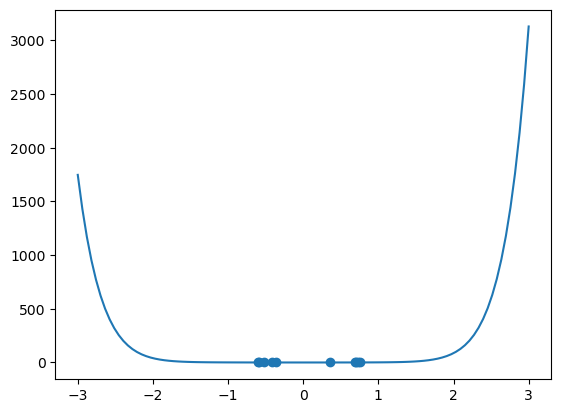

In [10]:
# 绘图部分
order = np.arange(k+1)
order = order[:, np.newaxis]
e = np.tile(order, [1,100])

plot_x = np.linspace(-3,3,100)
plot_XT = np.power(plot_x, e)
plot_y = W.T @ plot_XT


plot_y.shape,plot_x.shape

plt.figure()
plt.scatter(x[0],y[0])
plt.plot(plot_x,plot_y[0,:])

array([[ 0.12357429],
       [-0.00131901],
       [ 0.45855694],
       [ 0.06560397],
       [ 0.26171317],
       [ 0.06441481],
       [ 0.12982574],
       [ 0.04607259],
       [ 0.06395054],
       [ 0.02910584],
       [ 0.03216086]])

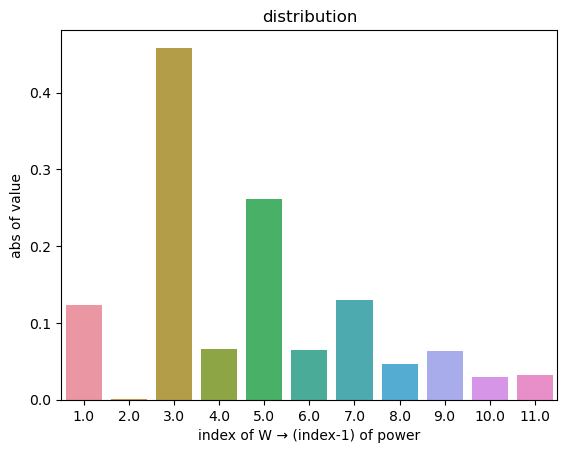

In [11]:
sns.barplot(x=np.linspace(1,k+1,k+1),y=np.abs(W[:,0]))
plt.xlabel('index of W → (index-1) of power')
plt.ylabel('abs of value')
plt.title('distribution')

W

# SGD
solve $\frac{\partial \mathcal L}{\partial W}= X^T X W-X^T Y$,have $W^{(t+1)}:=W^{(t)}-\eta\frac{\partial \mathcal L}{\partial W}\bigg|_{W=W^{(t)}}$

Text(0, 0.5, 'loss_value')

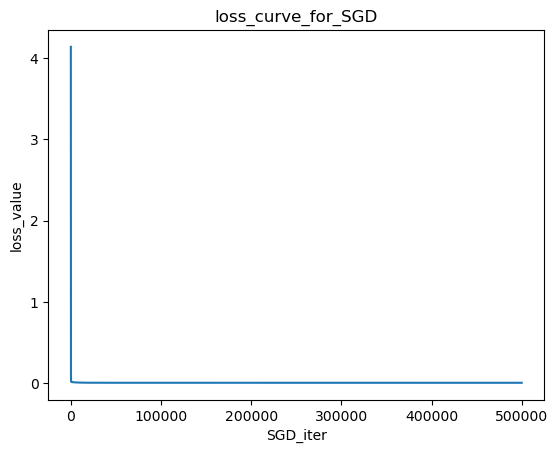

In [21]:
itertation = 50000
eta = 0.05
# SGD 梯度下降

W = np.random.rand(k+1,1)
# 计算X，Y
order = np.arange(k+1)
order = order[:, np.newaxis]
e = np.tile(order, [1,D])
XT = np.power(x, e)
X = np.transpose(XT)

# a = np.matmul(XT, X) 
# b = np.matmul(XT, Y) 
loss = []
for epoch in range(itertation):
    for j in range(D):
        x_j = XT[:,j:j+1] 
        a = np.matmul(XT, X) 
        b = np.matmul(XT, Y) 
        partial_W = eta * (a @ W - b)
        W = W - eta * partial_W
        loss.append((1/2) *np.linalg.norm(X @ W-Y,ord=2)**2)
        
# 计算SGD损失情况
index_ = np.arange(itertation*D)
plt.title('loss_curve_for_SGD')
plt.plot(index_,loss)
plt.xlabel('SGD_iter')
plt.ylabel('loss_value')

###  +SGD landscape of [-1,1]

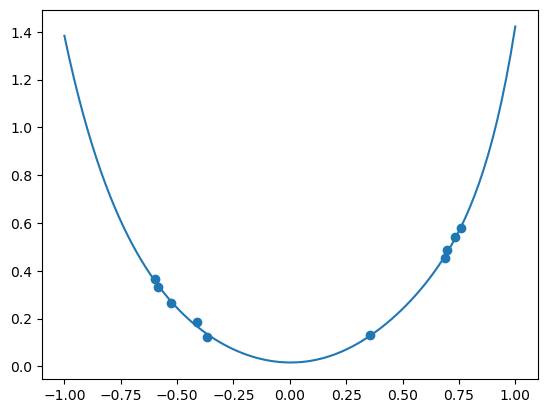

In [22]:
# 绘图部分
order = np.arange(k+1)
order = order[:, np.newaxis]
e = np.tile(order, [1,100])

plot_x = np.linspace(-1,1,100)
plot_XT = np.power(plot_x, e)
plot_y = W.T @ plot_XT


plot_y.shape,plot_x.shape

plt.figure()
plt.scatter(x[0],y[0])
plt.plot(plot_x,plot_y[0,:])

###  +SGD landscape of [-3,3]

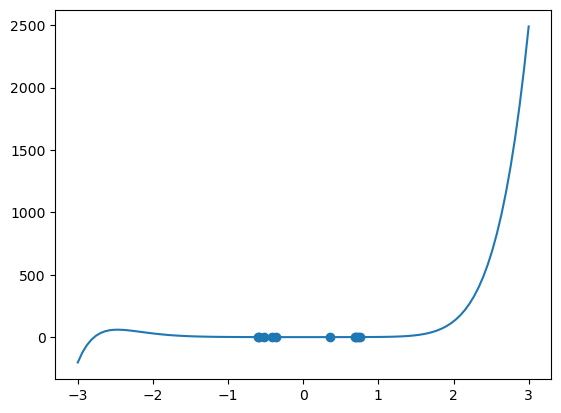

In [23]:
# 绘图部分
order = np.arange(k+1)
order = order[:, np.newaxis]
e = np.tile(order, [1,100])

plot_x = np.linspace(-3,3,100)
plot_XT = np.power(plot_x, e)
plot_y = W.T @ plot_XT


plot_y.shape,plot_x.shape

plt.figure()
plt.scatter(x[0],y[0])
plt.plot(plot_x,plot_y[0,:])

array([[ 0.01673063],
       [-0.00604772],
       [ 0.86628654],
       [ 0.09847214],
       [ 0.10733751],
       [-0.44485376],
       [ 0.09299996],
       [ 0.33534992],
       [ 0.33898639],
       [ 0.03649171],
       [-0.01973481]])

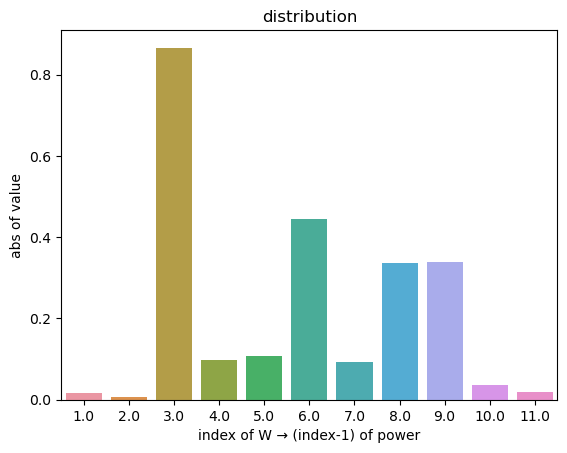

In [24]:
sns.barplot(x=np.linspace(1,k+1,k+1),y=np.abs(W[:,0]))
plt.xlabel('index of W → (index-1) of power')
plt.ylabel('abs of value')
plt.title('distribution')

W

# Paritial Update for W——boosting update W
$\zeta_{j}^{(t)}=
\begin{cases}
0,&Pr=\delta\\
\frac{1}{\delta-1},&Pr=1-\delta\\
\end{cases},\zeta^{(t)}\in \Bbb R^{(k+1)\times 1}$


$
\arg_W\min \Bbb E_{\zeta}\bigg[||XW\odot \zeta-Y||_F^2\bigg]\\
= \arg_W\min \Bbb E_{\zeta}\bigg[ \sum_{n=1}^{|D|}\bigg(\sum_{i=1}^{k+1} x_i^{(n)}\zeta_iw_i-y_n\bigg)^2\bigg]\\
= \arg_W\min \bigg[ ||XW-Y||_F^2 +\frac{\delta}{1-\delta}||XW||_F^2\bigg](详细推导省略,X\in \Bbb R^{|D|\times (k+1)}||X_{[j,:]}||_2^2\ne 1可以发现正则项和岭回归的不同)
$

$
auxiliary\;variables 引入\arg_W\min \frac{1}{T}\sum_{t=1}^{T} \bigg[||XZ^{(t)}\odot \zeta^{(t)}-Y||_F^2\bigg]+\lambda ||Z^{(t)}\odot \zeta^{(t)}-W||_F^2
$

step1: fixed $W_k$ update $\{Z^{(t)}\}_{t=1}^T$ :
$
\hat X^T(\hat X \hat Z^{(t)}-Y)+\lambda (\hat Z^{(t)}- \hat W^{(t)}) = 0\\
\hat Z^{(t)} =\color{red}{(\hat X^T \hat X+\lambda I)^{-1}}(\lambda \hat W^{(t)}+\hat X^T Y),where\; \hat X 的维度\zeta^{(t)}非0索引筛选\\
$
step2: fixed $\{Z^{(t)}\}_{t=1}^T$  update $W_{k+1}$:
$
W_{k+1} = \frac{1}{T}\sum_{t=1}^T Z^{(t)} 
$

由于使用𝑎𝑢𝑥𝑖𝑙𝑖𝑎𝑟𝑦 𝑣𝑎𝑟𝑖𝑎𝑏𝑙𝑒𝑠 方式引入，这样会在优化问题中本身存有一个L2范数的约束效果，因此这样的作法能够保证其在dropout W参数不多的情况下效果较好

In [69]:
# 独立求解T个子问题，但是遮罩Z
T = 50
# 计算X，Y
order = np.arange(k+1)
order = order[:, np.newaxis]
e = np.tile(order, [1,D])
XT = np.power(x, e)
X = np.transpose(XT)

In [70]:
W = np.random.rand(k+1,1)
lambda_ = 0.1
for iter in range(300):
    # fixed W
    temp = np.zeros([k+1,1])
    for t in range(T):
        # 不同的dropout
        p = 0.5
        const = (1/(1-p))
        zeta = np.ones([k+1,1])
        rand_mu = np.random.uniform(0,1,(k+1,1))
        zeta = np.multiply(zeta,rand_mu>p)
        # 采集非零数据进行实验
        X_drop = np.multiply(X,zeta.T)[:,(zeta>0)[:,0]]
        XT_drop = X_drop.T
        W_drop = W[(zeta>0)[:,0],:]
        I = np.eye(X_drop.shape[1])

        a = np.matmul(XT_drop, X_drop) + lambda_ * np.identity(XT_drop.shape[0])
        b = (np.matmul(XT_drop, Y) + lambda_ * W_drop )* (1/const)
        Z_drop = np.linalg.solve(a,b)
        temp[(zeta>0)[:,0],:] =  temp[(zeta>0)[:,0],:] + Z_drop
    W = const*(temp/T)

###  +boosting landscape of [-1,1]

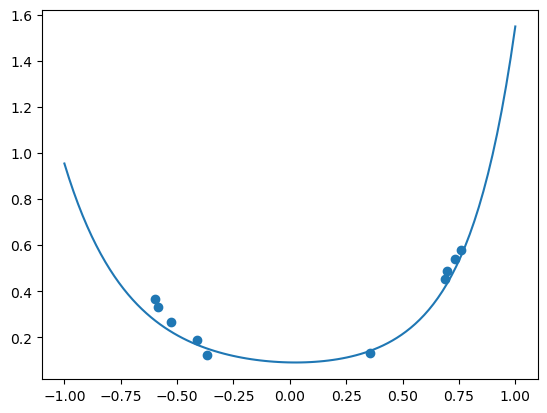

In [71]:
# 绘图部分
order = np.arange(k+1)
order = order[:, np.newaxis]
e = np.tile(order, [1,100])

plot_x = np.linspace(-1,1,100)
plot_XT = np.power(plot_x, e)
plot_y = W.T @ plot_XT


plot_y.shape,plot_x.shape

plt.figure()
plt.scatter(x[0],y[0])
plt.plot(plot_x,plot_y[0,:])

###  +boosting landscape of [-3,3]

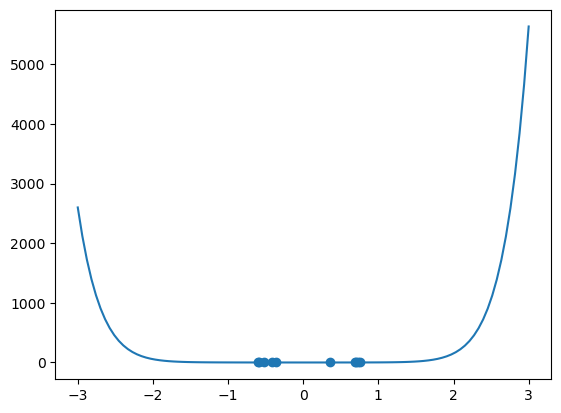

In [72]:
# 绘图部分
order = np.arange(k+1)
order = order[:, np.newaxis]
e = np.tile(order, [1,100])

plot_x = np.linspace(-3,3,100)
plot_XT = np.power(plot_x, e)
plot_y = W.T @ plot_XT


plot_y.shape,plot_x.shape

plt.figure()
plt.scatter(x[0],y[0])
plt.plot(plot_x,plot_y[0,:])

array([[ 0.09042136],
       [-0.01843957],
       [ 0.36714255],
       [ 0.06036527],
       [ 0.39025472],
       [ 0.10983998],
       [ 0.26408037],
       [ 0.07856406],
       [ 0.08211472],
       [ 0.06695476],
       [ 0.05677134]])

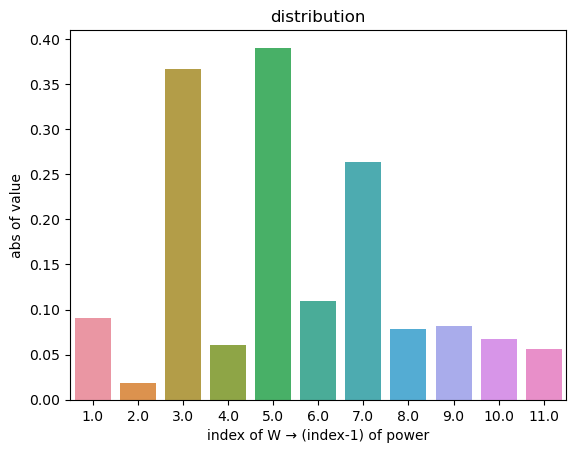

In [73]:
sns.barplot(x=np.linspace(1,k+1,k+1),y=np.abs(W[:,0]))
plt.xlabel('index of W → (index-1) of power')
plt.ylabel('abs of value')
plt.title('distribution')

W

由于使用𝑎𝑢𝑥𝑖𝑙𝑖𝑎𝑟𝑦 𝑣𝑎𝑟𝑖𝑎𝑏𝑙𝑒𝑠 方式引入，这样会在优化问题中本身存有一个L2范数的约束效果，因此这样的作法能够保证其在dropout W参数不多的情况下效果较好